In [1]:
import cdsapi

c = cdsapi.Client()

# c.retrieve(
#     'satellite-sea-ice-concentration',
#     {
#         'version': 'v2',
#         'variable': 'all',
#         'format': 'zip',
#         'year': [
#             '1979', '1980', '1981',
#             '1982', '1983', '1984',
#             '1985', '1986', '1987',
#             '1988', '1989', '1990',
#             '1991', '1992', '1993',
#             '1994', '1995', '1996',
#             '1997', '1998', '1999',
#             '2000', '2001', '2002',
#             '2003', '2004', '2005',
#             '2006', '2007', '2008',
#             '2009', '2010', '2011',
#             '2012', '2013', '2014',
#             '2015',
#         ],
#         'origin': 'eumetsat_osi_saf',
#         'region': [
#             'northern_hemisphere', 'southern_hemisphere',
#         ],
#         'cdr_type': 'cdr',
#         'month': [
#             '03', '09',
#         ],
#         'day': [
#             '01', '02',
#         ],
#     },
#     '../data/download.zip')

In [2]:
# import cdsapi

# c = cdsapi.Client()

# c.retrieve(
#     'satellite-sea-ice-concentration',
#     {
#         'version': 'v2',
#         'variable': 'all',
#         'format': 'zip',
#         'origin': 'eumetsat_osi_saf',
#         'region': [
#             'northern_hemisphere', 'southern_hemisphere',
#         ],
#         'cdr_type': 'icdr',
#         'year': [
# #             '2016', '2017', '2018',
# #             '2019', '2020', 
#             '2021',
#         ],
#         'month': [
# #             '03',
#             '09',
#         ],
#         'day': '01',
#     },
#     '../data/interim.zip')

In [3]:
import numpy as np
import pandas as pd
from netCDF4 import Dataset
from cartoplot import cartoplot
import matplotlib.pyplot as plt
import itertools
import cartopy.feature as cfea
import cartopy.crs as ccrs
import cartopy
import string

2022-02-14 14:31:11,523 INFO Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2022-02-14 14:31:11,523 INFO NumExpr defaulting to 8 threads.


/tmp/ipykernel_23254/1562590099.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  conc = np.array( d['ice_conc'][0][:-1,:-1] )


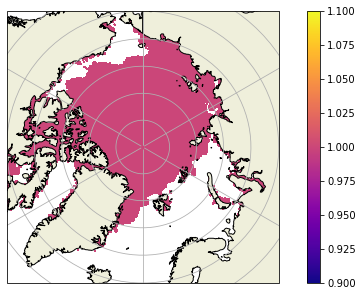

In [4]:
# d = Dataset('/home/robbie/Dropbox/book_chapter/data/interim/ice_conc_nh_ease2-250_icdr-v2p0_202109011200.nc')

d = Dataset('/home/robbie/Dropbox/book_chapter/data/min_max_concs/ice_conc_nh_ease2-250_cdr-v2p0_197909011200.nc')

conc = np.array( d['ice_conc'][0][:-1,:-1] )

conc[conc<0] = np.nan
conc[conc<0.01] = np.nan
conc[conc>0.01] = 1

# plt.imshow

cartoplot(d['lon'], d['lat'], conc)

/tmp/ipykernel_23254/4147379807.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  conc = np.array( d['ice_conc'][0])


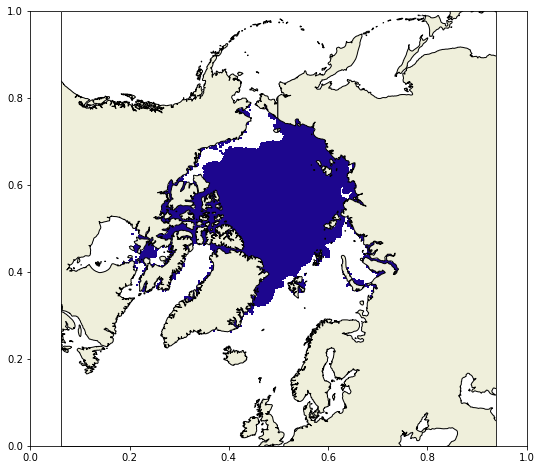

In [5]:
d = Dataset('/home/robbie/Dropbox/book_chapter/data/min_max_concs/ice_conc_nh_ease2-250_cdr-v2p0_197909011200.nc')

# d = Dataset('/home/robbie/Dropbox/book_chapter/data/interim/ice_conc_nh_ease2-250_icdr-v2p0_202109011200.nc')


conc = np.array( d['ice_conc'][0])

conc[conc<0] = np.nan
conc[conc<0.01] = np.nan
conc[conc>0.01] = 1


fig, ax = plt.subplots(1,1,figsize=(8.9,8))

ax = plt.axes(projection=ccrs.NorthPolarStereo())
   
ax.set_extent([-180, 180, 90, 50], ccrs.PlateCarree())

im = ax.pcolormesh(d['lon'], d['lat'], conc[:-1,:-1], vmin = 0, vmax = 40,
         transform=ccrs.PlateCarree(),zorder=0,cmap='plasma')

ax.add_feature(cartopy.feature.LAND.with_scale('50m'), edgecolor='black',zorder=1)

# plt.savefig(f'/home/robbie/Dropbox/geog_talk/1979.jpg',dpi=500, bbox_inches='tight')

plt.show()

/tmp/ipykernel_23254/3086333161.py:19: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  conc = np.array(d['ice_conc'][0])


1980 n 03
1981 n 03


/tmp/ipykernel_23254/3086333161.py:32: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  conc = np.array(d['ice_conc'][0])
/tmp/ipykernel_23254/3086333161.py:39: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lons = np.array(d['lon'])
/tmp/ipykernel_23254/3086333161.py:40: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To si

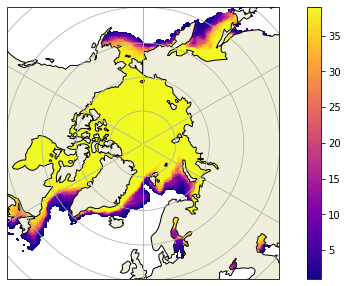

1980 s 03
1981 s 03


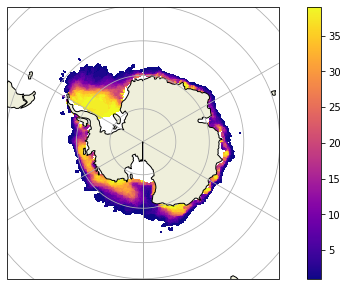

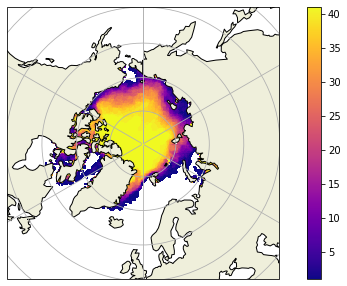

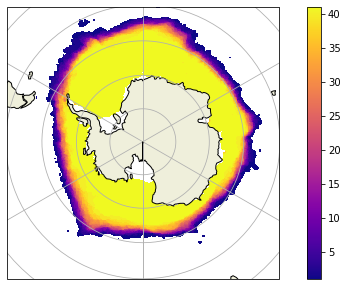

In [6]:


months = ['03','09']

data_dir = '/home/robbie/Dropbox/book_chapter/data/min_max_concs'

results = {}

for month, hem in itertools.product(months,['n','s']):

    concs = []

    for year in np.arange(1979,2016):

        try:
            try:
                d = Dataset(f'{data_dir}/ice_conc_{hem}h_ease2-250_cdr-v2p0_{year}{month}011200.nc')
            except:
                d = Dataset(f'{data_dir}/ice_conc_{hem}h_ease2-250_cdr-v2p0_{year}{month}021200.nc')

            conc = np.array(d['ice_conc'][0])

            conc[conc<15] = np.nan
            conc[conc>=15] = 1

            concs.append(conc)
        except:
            print(year, hem, month)
            
    for year in np.arange(2016,2020):

        d = Dataset(f'{data_dir}/ice_conc_{hem}h_ease2-250_icdr-v2p0_{year}{month}011200.nc')

        conc = np.array(d['ice_conc'][0])

        conc[conc<15] = np.nan
        conc[conc>=15] = 1

        concs.append(conc)

    lons = np.array(d['lon'])
    lats = np.array(d['lat'])

    concs_sum = np.nansum(concs,axis=0)

    concs_sum[concs_sum==0] = np.nan
    
    results[f'{month}{hem}'] = (lons,lats,concs_sum)

    cartoplot(lons,lats,concs_sum, bounding_lat=50, hemisphere=hem)

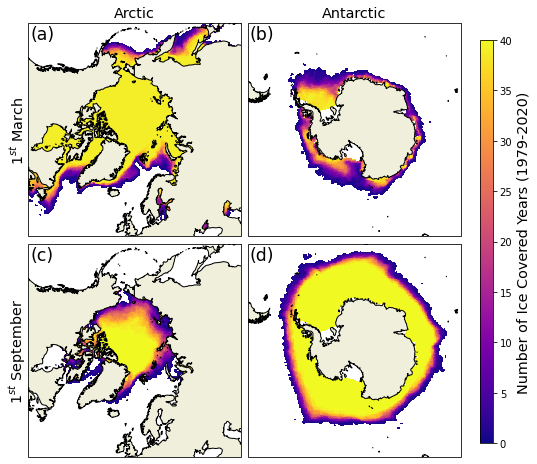

In [8]:
def make_f1(cmap):

    fig, axs = plt.subplots(2,2,figsize=(8.9,8))


    for counter, key in enumerate(results.keys(), 1):

        if key[-1] == 'n':
            ax = plt.subplot(2, 2, counter, projection=ccrs.NorthPolarStereo())
            ax.set_extent([-180, 180, 90, 50], ccrs.PlateCarree())

        elif key[-1] == 's':
            ax = plt.subplot(2, 2, counter, projection=ccrs.SouthPolarStereo())       
            ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())

        im = ax.pcolormesh(results[key][0], results[key][1], results[key][2][:-1,:-1], vmin = 0, vmax = 40,
                     transform=ccrs.PlateCarree(),zorder=0,cmap=cmap)

        ax.add_feature(cartopy.feature.LAND.with_scale('50m'), edgecolor='black',zorder=1)
#         ax.coastlines()

        ax.plot([180, 180], [-90, -85],
                 zorder=3, color=cfea.COLORS['land'],
                 linewidth=2,
                 transform=ccrs.PlateCarree())



        if key == '03n':
            ax.set_title('Arctic', fontsize='x-large')
            ax.annotate(xy=(-0.05,0.5),rotation=90,text='1$^{st}$ March',
                        xycoords='axes fraction', fontsize='x-large', ha='center',va='center')
        if key == '03s':
            ax.set_title('Antarctic', fontsize='x-large')
        if key == '09n':
            ax.annotate(xy=(-0.05,0.5),rotation=90,text='1$^{st}$ September',
                        xycoords='axes fraction', fontsize='x-large', ha='center',va='center')
            
            
    axs = fig.axes
    
    for ax, letter in zip(axs,string.ascii_letters):
        ax.annotate(f'({letter})',fontsize='xx-large',xy=(0.01,0.99),va='top',xycoords='axes fraction',
                     zorder=10)

    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.83, 0.15, 0.02, 0.7])
    cb = fig.colorbar(im, cax=cbar_ax)
    cbar_ax.set_ylabel('Number of Ice Covered Years (1979-2020)', fontsize='x-large')

    fig.subplots_adjust(wspace=0.03,hspace=0.03)
    

    fig_num = 1

    for data_dir in['/home/robbie/Dropbox/book_chapter/figs',
                     '/home/robbie/Dropbox/Apps/Overleaf/Book_chapter/figs']:

        plt.savefig(f'{data_dir}/fig{fig_num}_cmap.jpg',dpi=500, bbox_inches='tight')

    plt.show()
    
make_f1('plasma')
# make_f1('binary')